# UCI Concrete Compressive Strength Dataset Model Analysis

## Table of Contents
1. [Summary](#summary)
2. [Introduction](#introduction)
3. [Data Exploration](#data-exploration)
4. [Models](#models)
    - [Linear Regression](#linreg)
    - [Ridge Regression](#RR)
    - [ElasticNet](#EN)
    - [Multilayer Perceptron](#MLP)
    - [Deep Learning](#DL)
5. [Analysis](#analysis)
6. [Conclusion](#conclusion)


### Packages Used

In [1]:
import UCIConcreteCompressiveStrength as ccs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

#from sklearn.linear_model import LinearRegression, ElasticNet, ElasticNetCV, Lasso, LassoCV, 

In [2]:
datapath = 'data/Concrete_Data.xls'
df = ccs.cleanData(datapath)
#round data??????

In [3]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Agg,Fine_Agg,Age,Concrete_Compressive_Str
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Agg,Fine_Agg,Age,Concrete_Compressive_Str
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Cement                    1030 non-null   float64
 1   Blast_Furnace_Slag        1030 non-null   float64
 2   Fly_Ash                   1030 non-null   float64
 3   Water                     1030 non-null   float64
 4   Superplasticizer          1030 non-null   float64
 5   Coarse_Agg                1030 non-null   float64
 6   Fine_Agg                  1030 non-null   float64
 7   Age                       1030 non-null   int64  
 8   Concrete_Compressive_Str  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.isnull().sum()

Cement                      0
Blast_Furnace_Slag          0
Fly_Ash                     0
Water                       0
Superplasticizer            0
Coarse_Agg                  0
Fine_Agg                    0
Age                         0
Concrete_Compressive_Str    0
dtype: int64

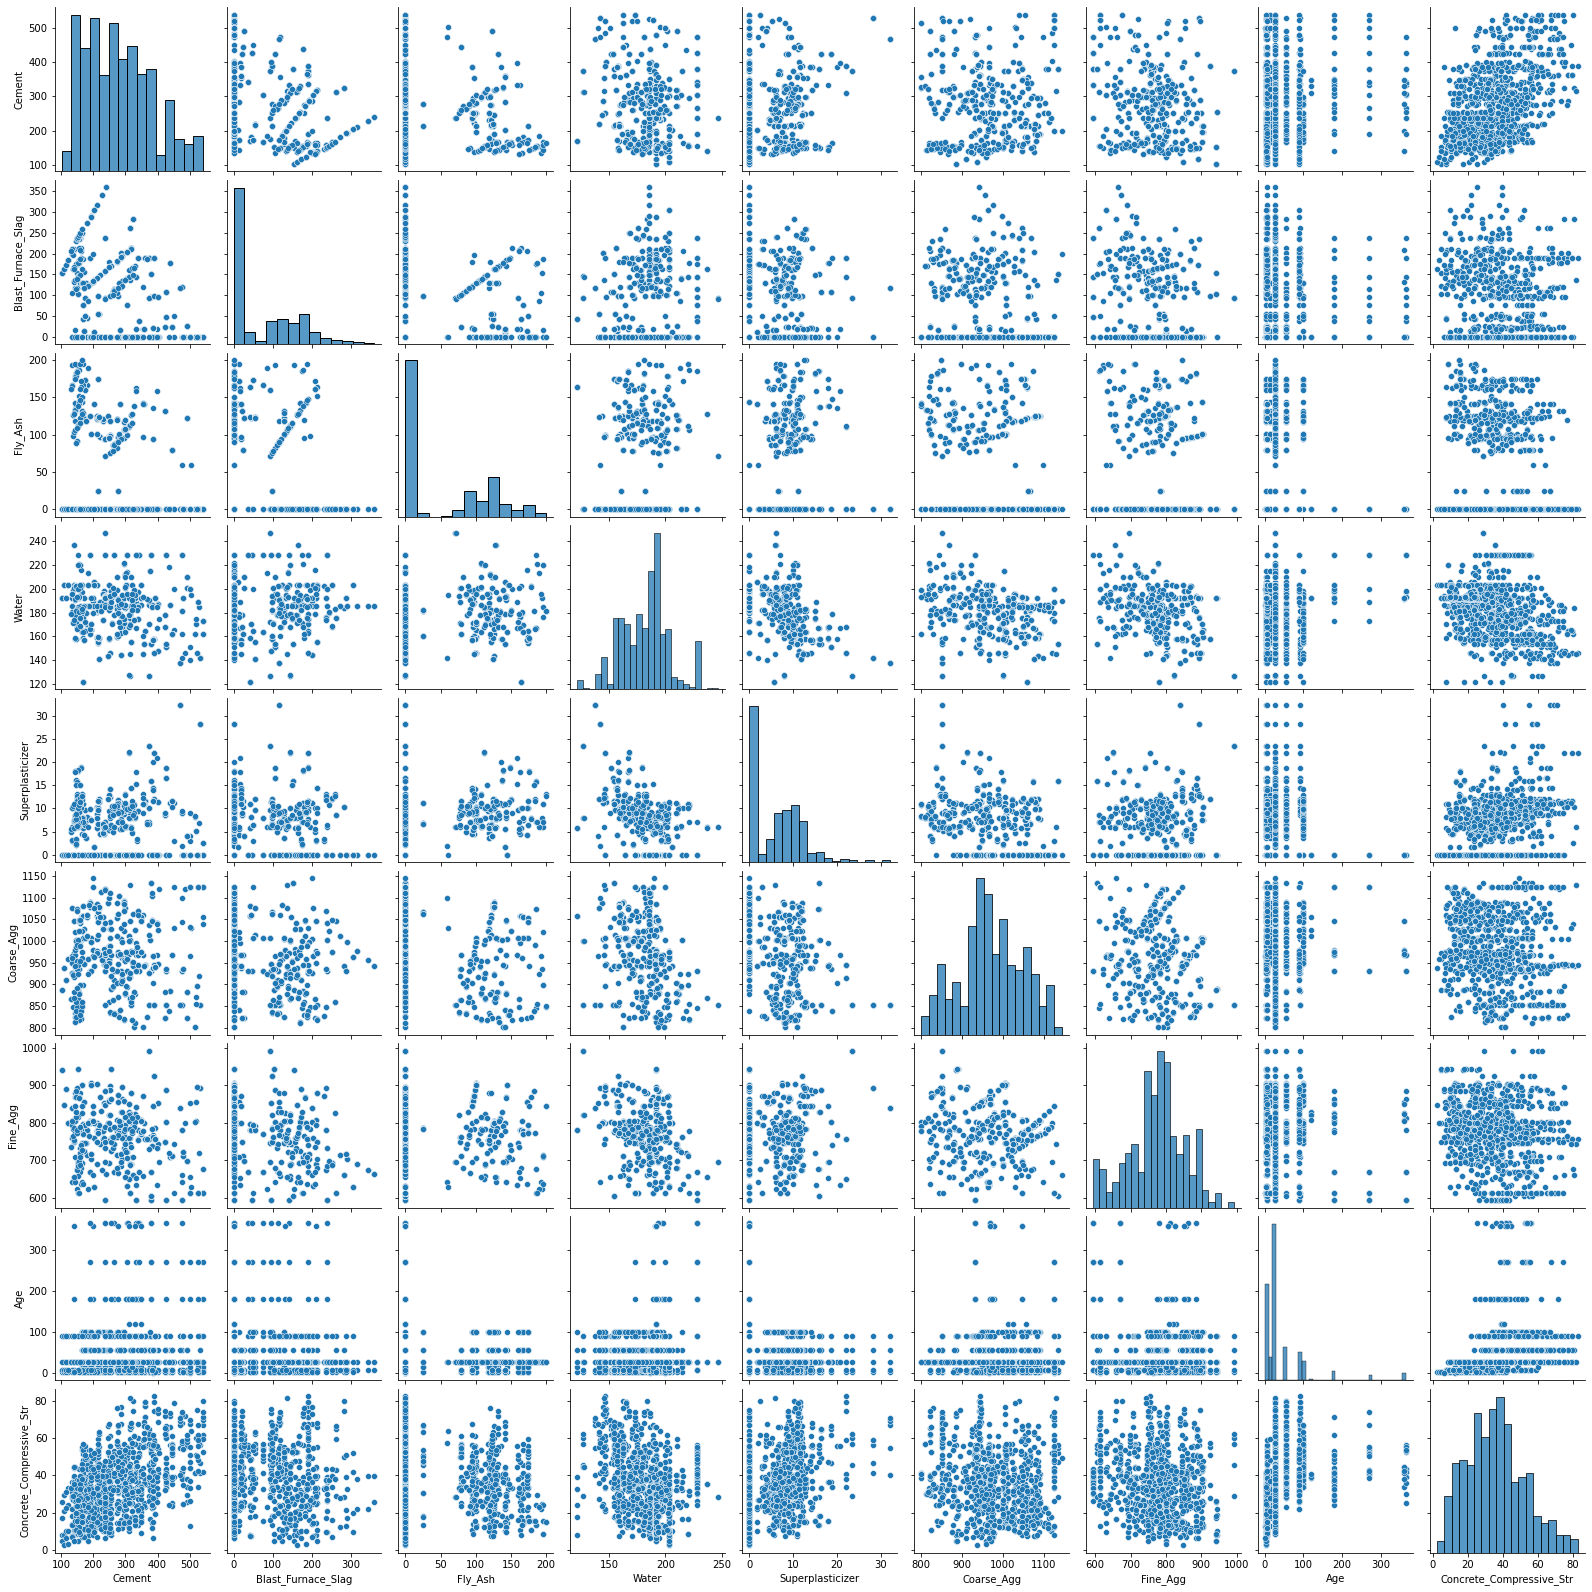

In [7]:
sns.pairplot(df)

## Summary <a class="anchor" id="summary"></a>

# Standardized

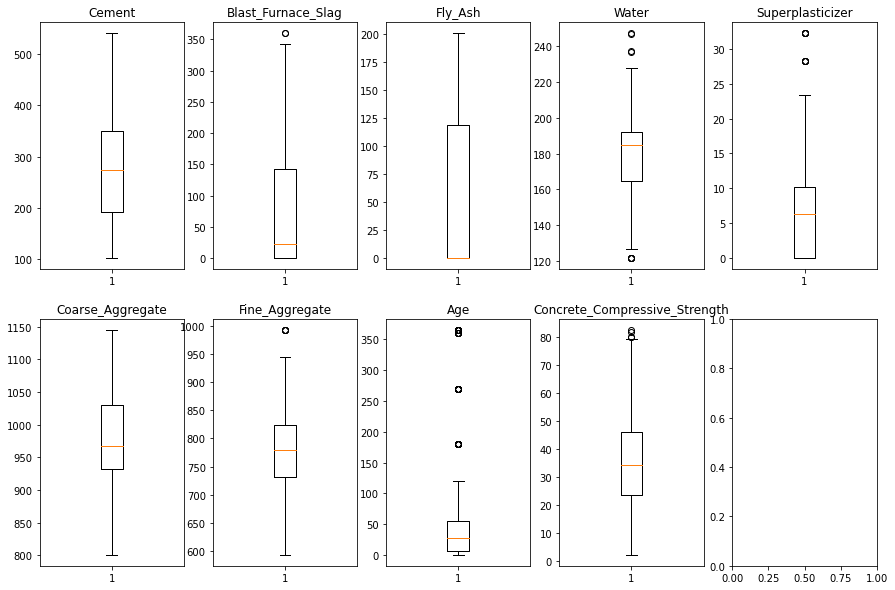

In [7]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (15, 10))
axs[0,0].boxplot(df.Cement)
axs[0,0].set_title('Cement')

axs[0,1].boxplot(df.Blast_Furnace_Slag)
axs[0,1].set_title('Blast_Furnace_Slag')

axs[0,2].boxplot(df.Fly_Ash)
axs[0,2].set_title('Fly_Ash')

axs[0,3].boxplot(df.Water)
axs[0,3].set_title('Water')

axs[0,4].boxplot(df.Superplasticizer)
axs[0,4].set_title('Superplasticizer')

axs[1,0].boxplot(df.Coarse_Agg)
axs[1,0].set_title('Coarse_Aggregate')

axs[1,1].boxplot(df.Fine_Agg)
axs[1,1].set_title('Fine_Aggregate')

axs[1,2].boxplot(df.Age)
axs[1,2].set_title('Age')

axs[1,3].boxplot(df.Concrete_Compressive_Str)
axs[1,3].set_title('Concrete_Compressive_Strength')


plt.show()

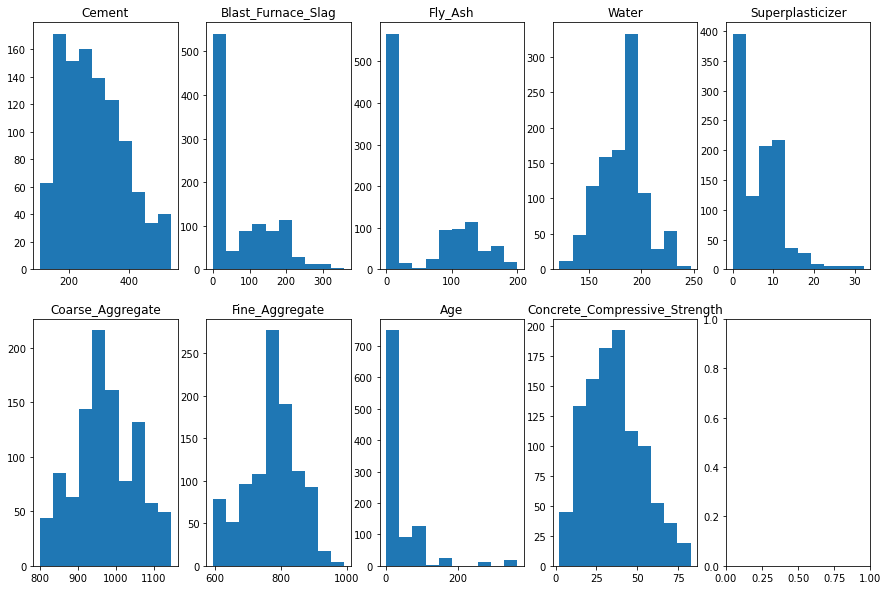

In [8]:
fig, axs = plt.subplots(nrows = 2, ncols = 5, figsize = (15, 10))
axs[0,0].hist(df.Cement)
axs[0,0].set_title('Cement')

axs[0,1].hist(df.Blast_Furnace_Slag)
axs[0,1].set_title('Blast_Furnace_Slag')

axs[0,2].hist(df.Fly_Ash)
axs[0,2].set_title('Fly_Ash')

axs[0,3].hist(df.Water)
axs[0,3].set_title('Water')

axs[0,4].hist(df.Superplasticizer)
axs[0,4].set_title('Superplasticizer')

axs[1,0].hist(df.Coarse_Agg)
axs[1,0].set_title('Coarse_Aggregate')

axs[1,1].hist(df.Fine_Agg)
axs[1,1].set_title('Fine_Aggregate')

axs[1,2].hist(df.Age)
axs[1,2].set_title('Age')

axs[1,3].hist(df.Concrete_Compressive_Str)
axs[1,3].set_title('Concrete_Compressive_Strength')


plt.show()

In [18]:
df_standard = (df - df.mean())/df.std()
X = df_standard[['Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Agg','Fine_Agg','Age']]
y = df_standard['Concrete_Compressive_Str']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = .9,test_size = .1, shuffle = True, random_state = 42)

In [19]:
print(X_train,y_train)

       Cement  Blast_Furnace_Slag   Fly_Ash     Water  Superplasticizer  \
806  0.964856           -0.856470 -0.846721  0.160784         -1.038440   
168  1.797335            0.501912 -0.846721 -2.049412          4.352042   
590 -0.412083           -0.856470 -0.846721  0.193563         -1.038440   
464 -1.092419            0.017438  1.762798 -0.821161          0.285744   
998  0.226151           -0.856470  0.709615  0.675873          0.602142   
..        ...                 ...       ...       ...               ...   
87   0.049129            1.472019 -0.846721 -1.726311          0.836510   
330 -0.328548           -0.856470  1.107762 -1.791868          0.968761   
466 -0.869085           -0.856470  1.109325 -0.700349          0.615534   
121  1.854748            0.520456 -0.846721 -0.021838          0.451476   
860  0.314183           -0.856470  0.919002 -0.541609          0.635623   

     Coarse_Agg  Fine_Agg       Age  
806    0.952769 -0.431290 -0.612034  
168   -1.553861  0.8346

# Linear Regression

In [26]:
reg = LinearRegression()
reg.fit(X, y)
#reg.score(X, y)
predstr = reg.predict(X_test)
np.sqrt(mean_squared_error(y_test,predstr))

0.595929688416395

# Ridge Regression with CV

In [49]:
from sklearn.linear_model import RidgeCV

In [55]:
ridgeReg = RidgeCV(alphas=[0.1, 1.0, 10.0], cv = 10).fit(X, y)
ridgeReg.score(X,y)

0.6144310828062696

# Lasso

In [57]:
from sklearn.linear_model import LassoCV

In [59]:
lasso = LassoCV(cv=5, random_state=0).fit(X, y)
lasso.score(X, y)

0.6134930924148225

# ElasticNet

In [60]:
from sklearn.linear_model import ElasticNetCV

In [62]:
elasticNet = ElasticNetCV(cv=5, random_state=0).fit(X,y)
elasticNet.score(X,y)

0.6135179354051915

# Mulit Layer Perceptron

In [64]:
from sklearn.neural_network import MLPRegressor

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = .9,test_size = .1)

In [100]:
X_train

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
403,0.716069,0.522774,-0.846721,-1.009871,0.473239,1.132824,-1.454048,-0.279597
984,-1.209158,-0.856470,1.384652,0.549442,0.484957,-1.231047,1.173940,-0.279597
840,0.275908,0.800941,-0.846721,-0.635261,0.635623,-0.757758,0.379432,-0.279597
12,1.400233,-0.305931,-0.846721,2.174311,-1.038440,-0.526258,-2.239824,3.551340
610,-0.432177,-0.856470,-0.846721,0.535394,-1.038440,-0.063259,1.389717,5.055221
...,...,...,...,...,...,...,...,...
105,1.154317,0.241130,-0.846721,-1.599881,0.869992,-0.335914,0.979366,-0.612034
196,-0.827557,-0.856470,0.723991,-0.746707,0.213759,0.430608,1.650395,-0.279597
162,0.888306,1.336413,-0.846721,-0.536926,0.652364,-0.602139,-0.210524,0.717713
77,1.376311,0.375578,-0.846721,-1.314241,1.723764,-1.553861,1.415909,-0.675355


In [101]:
mlpReg = MLPRegressor(hidden_layer_sizes=(16, ), max_iter=500, batch_size = 9).fit(X_train, y_train)
#mlpReg.predict(X_test[:2])

mlpReg.score(X_test, y_test)

0.91380371281023

# Deep Learning

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

In [102]:
EPOCHS = 20
BATCH_SIZE = 9

In [105]:
model1 = Sequential()
model1.add(Dense(16, input_dim=8, kernel_initializer='normal', activation='relu'))
model1.add(Dense(1,kernel_initializer='normal'))
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(X_train,y_train,batch_size=BATCH_SIZE, epochs=EPOCHS,shuffle = True)
score = model1.evaluate(X_test,y_test)
print(score)

Train on 927 samples
Epoch 1/20
927/927 [==============================] - 0s 383us/sample - loss: 0.9154
Epoch 2/20
927/927 [==============================] - 0s 94us/sample - loss: 0.5515
Epoch 3/20
927/927 [==============================] - 0s 87us/sample - loss: 0.3838
Epoch 4/20
927/927 [==============================] - 0s 87us/sample - loss: 0.3435
Epoch 5/20
927/927 [==============================] - 0s 90us/sample - loss: 0.3106
Epoch 6/20
927/927 [==============================] - 0s 93us/sample - loss: 0.2819
Epoch 7/20
927/927 [==============================] - 0s 88us/sample - loss: 0.2546
Epoch 8/20
927/927 [==============================] - 0s 94us/sample - loss: 0.2342
Epoch 9/20
927/927 [==============================] - 0s 90us/sample - loss: 0.2173
Epoch 10/20
927/927 [==============================] - 0s 94us/sample - loss: 0.2038
Epoch 11/20
927/927 [==============================] - 0s 88us/sample - loss: 0.1932
Epoch 12/20
927/927 [==============================]